In [71]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
assets = ["TSLA", "BND", "SPY"]
start_date = "2015-01-01"
end_date = "2025-01-31"

In [73]:
# Fetch historical data from YFinance
data = yf.download(assets, start=start_date, end=end_date)

[*********************100%***********************]  3 of 3 completed


In [74]:
print("Available columns in the dataset:", data.columns)

Available columns in the dataset: MultiIndex([( 'Close',  'BND'),
            ( 'Close',  'SPY'),
            ( 'Close', 'TSLA'),
            (  'High',  'BND'),
            (  'High',  'SPY'),
            (  'High', 'TSLA'),
            (   'Low',  'BND'),
            (   'Low',  'SPY'),
            (   'Low', 'TSLA'),
            (  'Open',  'BND'),
            (  'Open',  'SPY'),
            (  'Open', 'TSLA'),
            ('Volume',  'BND'),
            ('Volume',  'SPY'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])


In [75]:
print(data.head())

Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-01-02  62.573093  172.592896  14.620667  62.603378  173.811130   
2015-01-05  62.754826  169.475922  14.006000  62.777537  171.702325   
2015-01-06  62.936562  167.879654  14.085333  63.125833  170.316096   
2015-01-07  62.974392  169.971619  14.063333  63.050099  170.316085   
2015-01-08  62.875957  172.987701  14.041333  62.921381  173.206150   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-01-02  14.883333  62.398961  171.542703  14.217333  62.406534   
2015-01-05  14.433333  62.610977  169.165069  13.810667  62.641262   
2015-01-06  14.280000  62.860854  167.073100  13.614000  62.860854   
2015-01-07 

In [76]:
if 'Adj Close' in data:
    data = data['Adj Close']
else:
    data = data['Close']


In [77]:
data = data.ffill().bfill()

In [78]:
# Calculate daily returns
daily_returns = data.pct_change().dropna()

In [79]:
# Compute rolling statistics (30-day rolling mean and standard deviation)
rolling_mean = data.rolling(window=30).mean()
rolling_std = data.rolling(window=30).std()

In [80]:
# Compute Value at Risk (VaR) at 95% confidence level
var_95 = daily_returns.quantile(0.05)

In [81]:
# Compute Sharpe Ratio (Assuming a risk-free rate of 0.02 per year)
risk_free_rate = 0.02 / 252  # Daily risk-free rate
sharpe_ratio = (daily_returns.mean() - risk_free_rate) / daily_returns.std()

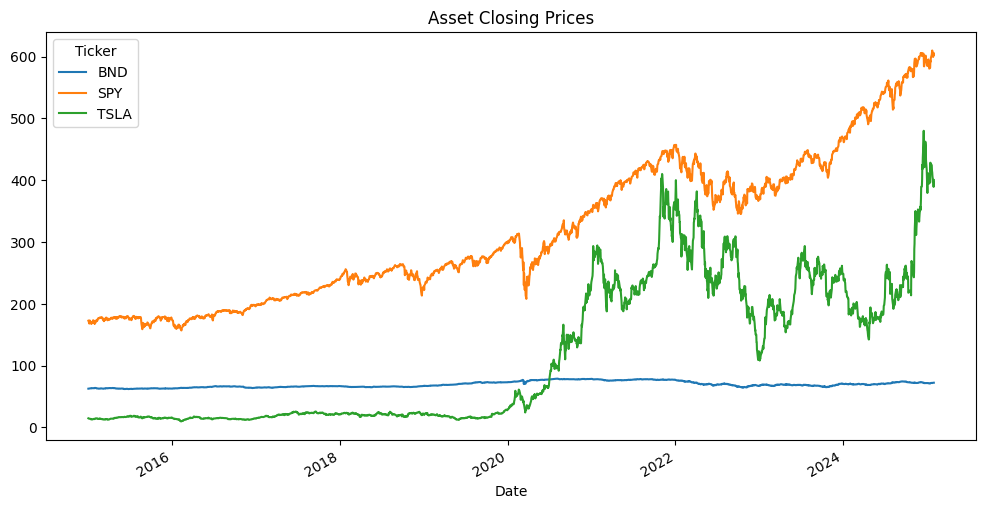

In [82]:
# Plot closing prices
data.plot(figsize=(12,6), title="Asset Closing Prices")
plt.show()

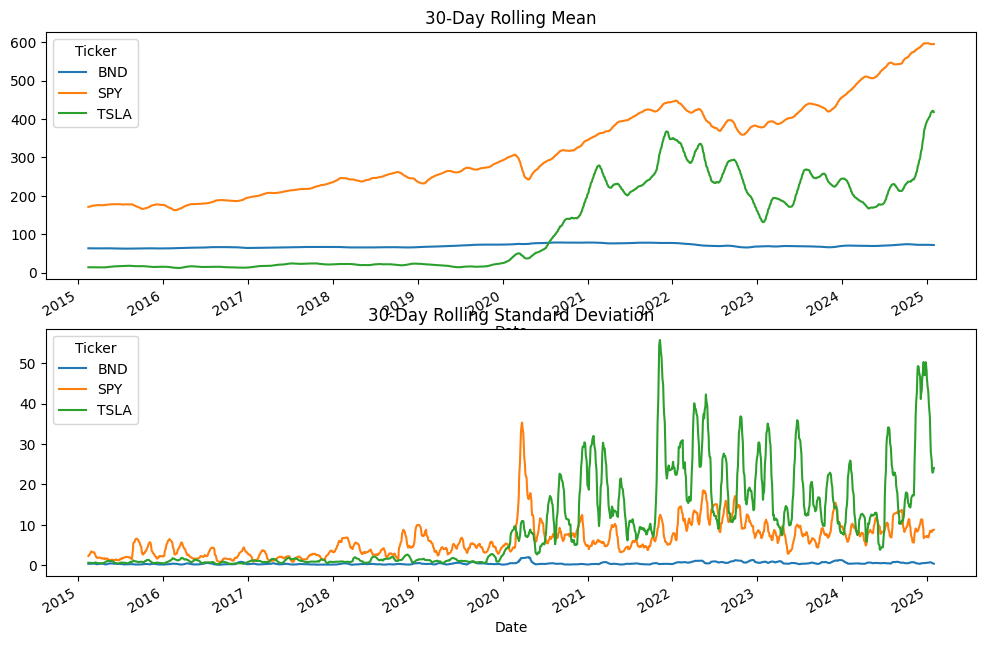

In [83]:
# Plot rolling mean and volatility
fig, ax = plt.subplots(2, 1, figsize=(12,8))
rolling_mean.plot(ax=ax[0], title='30-Day Rolling Mean')
rolling_std.plot(ax=ax[1], title='30-Day Rolling Standard Deviation')
plt.show()

In [84]:
# Print key risk metrics
print("Value at Risk (VaR 95%):\n", var_95)
print("\nSharpe Ratios:\n", sharpe_ratio)

Value at Risk (VaR 95%):
 Ticker
BND    -0.004801
SPY    -0.016719
TSLA   -0.051387
Name: 0.05, dtype: float64

Sharpe Ratios:
 Ticker
BND    -0.004955
SPY     0.043078
TSLA    0.052014
dtype: float64


In [ ]:
# Task 2: Develop Time Series Forecasting Models
# Focus on forecasting Tesla's stock prices

In [31]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.4 MB/s eta 0:00:00


In [92]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [93]:
#tsla_data = data['TSLA']
tsla_data = data['TSLA'].asfreq('B').ffill()
tsla_train, tsla_test = tsla_data[:'2023-12-31'], tsla_data['2024-01-01':]


In [94]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [95]:
# Auto ARIMA to find the best parameters
arima_model = auto_arima(tsla_train, seasonal=False, trace=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14722.679, Time=5.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14746.492, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14746.225, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14746.232, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14745.233, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14749.027, Time=2.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14750.223, Time=0.88 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=14728.239, Time=6.25 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14728.283, Time=3.98 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14748.217, Time=0.49 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14747.712, Time=1.98 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14748.318, Time=2.15 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=14730.226, Time=8.72 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=14721.434, Time=2.06 sec
 ARIMA(1,1,2)(0,0,0

In [96]:
# Fit ARIMA model with best parameters
best_order = arima_model.order
arima_model = ARIMA(tsla_train, order=best_order).fit()

In [97]:
# Forecast the next 12 months
forecast_steps = len(tsla_test)
tsla_forecast_arima = arima_model.forecast(steps=forecast_steps)

In [98]:
# SARIMA Model
sarima_model = SARIMAX(tsla_train, order=best_order, seasonal_order=(1,1,1,12)).fit()
tsla_forecast_sarima = sarima_model.forecast(steps=forecast_steps)

In [99]:
# LSTM Model
scaler = MinMaxScaler()
tsla_scaled = scaler.fit_transform(np.array(tsla_data).reshape(-1,1))
tsla_train_scaled, tsla_test_scaled = tsla_scaled[:len(tsla_train)], tsla_scaled[len(tsla_train):]

In [100]:
X_train, y_train, X_test, y_test = [], [], [], []
lookback = 60
for i in range(lookback, len(tsla_train_scaled)):
    X_train.append(tsla_train_scaled[i-lookback:i, 0])
    y_train.append(tsla_train_scaled[i, 0])
for i in range(lookback, len(tsla_test_scaled)):
    X_test.append(tsla_test_scaled[i-lookback:i, 0])
    y_test.append(tsla_test_scaled[i, 0])
X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [101]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0134
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0017
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0016
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0014
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0015
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0011
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0010
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0011
Epoch 9/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 9.4219e-04
Epoch 10/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0010
Epoch 11/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 7.9532e-04
Epoch 12/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0011
Epoch 13/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 9.0115e-04
Epoch 14/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 9.8872e-04
Epoch 15/20
143/143 ━━━━━━━━━━━━━

In [102]:
y_pred_lstm = model.predict(X_test)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
tsla_forecast_lstm = pd.Series(y_pred_lstm.flatten(), index=tsla_test.index[lookback:])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


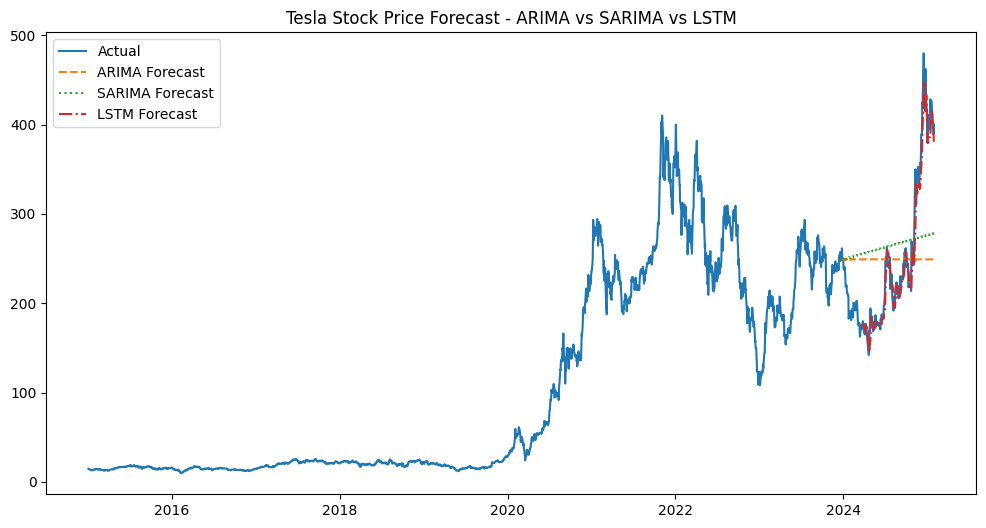

In [103]:
# Plot actual vs. forecasted prices
plt.figure(figsize=(12,6))
plt.plot(tsla_data.index, tsla_data, label='Actual')
plt.plot(tsla_test.index, tsla_forecast_arima, label='ARIMA Forecast', linestyle='dashed')
plt.plot(tsla_test.index, tsla_forecast_sarima, label='SARIMA Forecast', linestyle='dotted')
plt.plot(tsla_forecast_lstm.index, tsla_forecast_lstm, label='LSTM Forecast', linestyle='dashdot')
plt.legend()
plt.title("Tesla Stock Price Forecast - ARIMA vs SARIMA vs LSTM")
plt.show()

In [104]:
# Evaluate model performance
mae_arima = mean_absolute_error(tsla_test, tsla_forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(tsla_test, tsla_forecast_arima))
mae_sarima = mean_absolute_error(tsla_test, tsla_forecast_sarima)
rmse_sarima = np.sqrt(mean_squared_error(tsla_test, tsla_forecast_sarima))
mae_lstm = mean_absolute_error(tsla_test[lookback:], tsla_forecast_lstm)
rmse_lstm = np.sqrt(mean_squared_error(tsla_test[lookback:], tsla_forecast_lstm))

In [105]:
print(f"ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}")
print(f"SARIMA - MAE: {mae_sarima}, RMSE: {rmse_sarima}")
print(f"LSTM - MAE: {mae_lstm}, RMSE: {rmse_lstm}")


ARIMA - MAE: 66.33387775548292, RMSE: 83.16748983043468
SARIMA - MAE: 68.36817781084858, RMSE: 78.92648008086746
LSTM - MAE: 11.347198963165283, RMSE: 16.341621011437393
